In [1]:
import gym
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

from envs import Maze
%matplotlib inline
# Maze is a task. has 5X5 cells and agent has to find the xit

In [2]:
# creating the environment Maze()
env=Maze()#env is the object

In [3]:
initial_state=env.reset()# env object has function called reset which prepares the taskso that the agent can interact with it during an episode.
print(f"The new episode will start in state:{initial_state}")


The new episode will start in state:(0, 0)


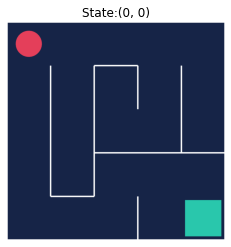

In [4]:
#to visualize the current state of the environment, render() is udes.
frame=env.render(mode='rgb_array') #render method on object env
#frame is our image
plt.axis('off')
plt.title(f"State:{initial_state}")
plt.imshow(frame)

In [5]:
#step()- to interact with the environment and take actions, this is used.
#This method applies the action selected by the agent in the environment, to modify it. In response, the environment returns a tuple of four objects:

#The next state
#The reward obtained
#(bool) if the task has been completed
#any other relevant information in a python dictionary
#env.step()- take sinput action. and returns the 4 things above.
#Actions= 0-go up, 1-go right.2-go down. 3- go left.
# here, reward will always be -1 until goal is reached.
#so need to get as less negative rewards as possible.

In [6]:
action=2 #integer assigned to that action.
next_state,reward,done,info=env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished


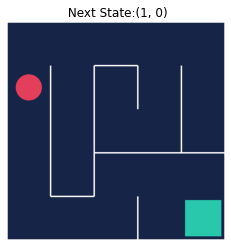

In [7]:
#render the next state.
frame=env.render(mode='rgb_array')
plt.axis('off')
plt.title(f" Next State:{next_state}")
plt.imshow(frame)

In [8]:
# to close the environment when we are donw interacting wiht it
env.close()
#we closed the control tasks.


MAZE- find the exit.


In this section we are going to familiarize ourselves with the environment that we'll use in the lessons 2 (dynamic programming), 3 (Monte Carlo methods) and 4 (temporal difference methods). This environment is perfect for learning the basics of Reinforcement Learning because:

It has few states (25)
Transitions between states are deterministic ( 𝑝(𝑠′,𝑟|𝑠,𝑎)=1 )
All rewards are the same (-1) until the episode concludes. Thus facilitating the study of the value and action-value functions
Through this environment, we are going to review the concepts seen in lesson 1 (The Markov decision process):

States and state space
Actions and action space
Trajectories and episodes
Rewards and returns
Policy
The environment is a maze of 5x5 cells, in which the goal of the agent is to find the exit, located in the lower right corner, in the cell (4,4). In the image, the exit is colored in light green.

To reach the exit, the agent can take four different actions: move up, move down, move left and move right.

In [9]:
#create the environment MAZe-

env=Maze()


##### States and state space

The states consist of a tuple of two integers, both in the range [0, 4], representing the row and column in which the agent is currently located:
<br>
<br>

\begin{equation}
    s = (row, column) \;\\
    row, column \in \{0,1,2,3, 4\}
\end{equation}
<br>
<br>
The state space (set of all possible states in the task) has 25 elements (all possible combinations of rows and columns):


\begin{equation}
    Rows \times Columns \;\\
    S = \{(0, 0), (0, 1), (1, 0), ...\}
\end{equation}

Information about the state space is stored in the env.observation_space property. In this environment, it is of MultiDiscrete([5 5]) type, which means that it consists of two elements (rows and columns), each with 5 different values.

In [10]:
print(f"For example, the initial state is: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state is: (0, 0)
The space state is of type: MultiDiscrete([5 5])


##### Actions and action space

In this environment, there are four different actions and they are represented by integers:

\begin{equation}
a \in \{0, 1, 2, 3\}
\end{equation}

- 0 -> move up
- 1 -> move right
- 2 -> move down
- 3 -> move left

To execute an action, simply pass it as an argument to the env.step method. Information about the action space is stored in the env.action_space property which is of Discrete(4) class. This means that in this case it only consists of an element in the range [0,4), unlike the state space seen above.

In [11]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}") # tell us that 0,1,2,3 are the actions available. thus 4.

An example of a valid action is: 1
The action state is of type: Discrete(4)


##### Trajectories and episodes

A trajectory is the sequence generated by moving from one state to another (both arbitrary)

\begin{equation}
  \tau = S_0, A_0, R_1, S_1, A_1, ... R_N, S_N,
\end{equation}



In [12]:
# to create a trajectory in 3 moves-
env=Maze() #object represents the environment.
state=env.reset()
trajectory=[] #storing the elements generated after taking the actions
for _ in range(3):
    action=env.action_space.sample() #action chosen randomly.
    next_state,reward,done,extra_infor=env.step(action)
    trajectory.append([state,action,reward,done,next_state])
    state=next_state
env.close()
print(f"Yay! you generated the trajectory!:\n{trajectory}")

Yay! you generated the trajectory!:
[[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)]]


An episode is a trajectory that goes from the initial state of the process to the final one:

\begin{equation}
  \tau = S_0, A_0, R_1, S_1, A_1, ... R_T, S_T,
\end{equation}
where T is the terminal state.


In [13]:
#creating an episode-
env=Maze() #object represents the environment.
state=env.reset()
episode=[]
done=False # we are staring the episode. its not over yet.if done=true then episode is finished.
#same as before but till the episode is done.or goal is reached.
while not done:
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state, action, reward, done, next_state])
    state = next_state
env.close()

print(f"Congrats! You just generated your first episode:\n{episode}")

Congrats! You just generated your first episode:
[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 1, -1.0, False, (2, 1)], [(2, 1), 1, -1.0, False, (2, 1)], [(2, 1), 1, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 2, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 0, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)]

##### Rewards and returns

A reward is numerical feedback that the environment generates when the agent takes an action *a* in a state *s*:

\begin{equation}
    r = r(s, a)
\end{equation}

Let's generate a reward from the environment:

In [14]:
#generate a reward-
env=Maze()
state=env.reset()
action=env.action_space.sample()
_,reward,_,_=env.step(action)
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of -1.0 by taking action 2 in state (0, 0)


In [15]:
#now let us assume a discount factor of gamma=0.99

The return associated with a moment in time *t* is the sum (discounted) of rewards that the agent obtains from that moment. We are going to calculate $G_0$, that is, the return to the beginning of the episode:

\begin{equation}
    G_0 = R_1 + \gamma R_2 + \gamma^2 R_3 + ... + \gamma^{T-1} R_T
\end{equation}



Let's assume that the discount factor $\gamma = 0.99$:

In [26]:
env=Maze()
state=env.reset()
done=False
gamma=0.99
G_0=0 #at t=0, no rewards yet.
t=0
while not done:
    action=env.action_space.sample()
    _,reward,done,_=env.step(action)
    G_0+=gamma**t*reward
    t+=1
env.close()

print(f"It took us {t} moves to find the exit,and each reward r(s,a)=-1. So, the return amounts to {G_0}") 


It took us 36 moves to find the exit,and each reward r(s,a)=-1. So, the return amounts to -30.35867819504261


##### Policy

A policy is a function $\pi(a|s) \in [0, 1]$ that gives the probability of an action given the current state. The function takes the state and action as inputs and returns a float in [0,1]. 

Since in practice we will need to compute the probabilities of all actions, we will represent the policy as a function that takes the state as an argument and returns the probabilities associated with each of the actions. Thus, if the probabilities are:

[0.5, 0.3, 0.1]

we will understand that the action with index 0 has a 50% probability of being chosen, the one with index 1 has 30% and the one with index 2 has 10%.

Let's code a policy function that chooses actions randomly:

In [50]:
#defining policy
def random_policy(state):
    return np.array([0.25]*4) #returns probability of picking that action. prob is 0.25

## Playing an episode with our random policy

In [51]:
env=Maze()
state=env.reset()


In [52]:
action_probabilities = random_policy(state) # computing probabilities of using {0,1,2,3} representing graphically,the probabilities.
#action_prob is a vector

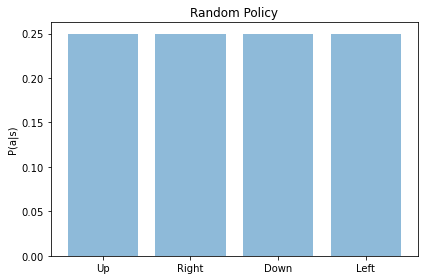

In [53]:
objects = ('Up', 'Right', 'Down', 'Left')
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probabilities, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()

plt.show()

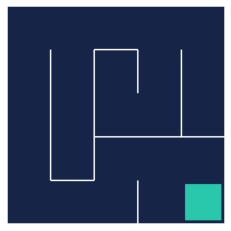

In [54]:
env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array')) 
while not done:
    action = np.random.choice(range(4), 1, p=action_probabilities)
    _, _, done, _ = env.step(action)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()